In [1]:
import pandas as pd 
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\chman\Downloads\EV_TimeSeries_50K_Extended.csv")

In [3]:
df

,date,region,ev_sales,charging_stations,ev_subsidy_inr,avg_range_km,Registered_Ev_count,Fuel_price_INR,Region_population,Region_Ev_buyers
0,2018-01,North,491,48,38000,292,982,90,1116800,461
1,2018-02,North,532,51,38000,292,1596,90,1335945,430
2,2018-03,North,573,54,38000,292,1719,97,2383600,807
3,2018-04,North,614,57,38000,292,1228,97,3608936,257
4,2018-05,North,655,60,38000,292,1965,106,3130397,746
...,...,...,...,...,...,...,...,...,...,...
50379,2018-01,West,720,64,45691,329,2049,90,1475652,895
50380,2021-10,East,2654,280,51755,342,5299,87,3167023,1437
50381,2024-10,North,4052,298,54905,377,12069,95,5005341,5487
50382,2024-03,South,3931,353,57981,371,11699,108,4389418,2309


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50384 entries, 0 to 50383
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date                 50384 non-null  object
 1   region               50384 non-null  object
 2   ev_sales             50384 non-null  int64 
 3   charging_stations    50384 non-null  int64 
 4   ev_subsidy_inr       50384 non-null  int64 
 5   avg_range_km         50384 non-null  int64 
 6   Registered_Ev_count  50384 non-null  int64 
 7   Fuel_price_INR       50384 non-null  int64 
 8   Region_population    50384 non-null  int64 
 9   Region_Ev_buyers     50384 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 3.8+ MB


In [5]:
df.isnull().sum()

date                   0
region                 0
ev_sales               0
charging_stations      0
ev_subsidy_inr         0
avg_range_km           0
Registered_Ev_count    0
Fuel_price_INR         0
Region_population      0
Region_Ev_buyers       0
dtype: int64

In [6]:
df["date"].value_counts()

date
2024-04    575
2018-03    574
2020-09    569
2022-07    568
2021-05    564
          ... 
2021-10    485
2025-05    482
2019-02    478
2022-09    478
2020-10    470
Name: count, Length: 96, dtype: int64

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df = df.sort_values('date')

In [9]:
df = df[df['region'] == "North"]

In [10]:
df.set_index('date', inplace=True)

In [11]:
ts = df['ev_sales']

In [12]:
ts

date
2018-01-01     491
2018-01-01     584
2018-01-01     483
2018-01-01     470
2018-01-01     520
              ... 
2025-12-01    4710
2025-12-01    4677
2025-12-01    4799
2025-12-01    4871
2025-12-01    4707
Name: ev_sales, Length: 12602, dtype: int64

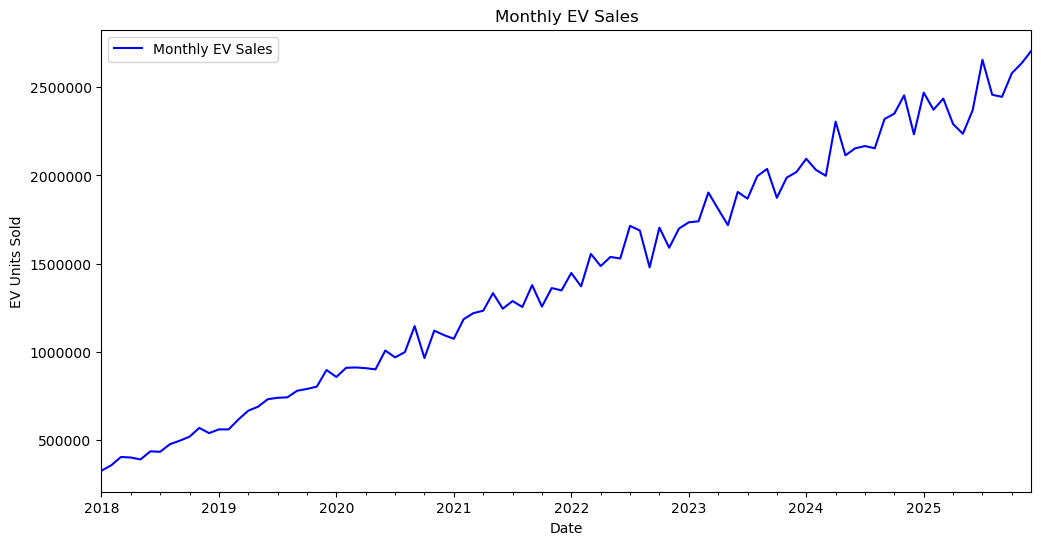

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load dataset
df = pd.read_csv(r"C:\Users\chman\Downloads\EV_TimeSeries_50K_Extended.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Resample monthly EV sales
monthly_sales = df['ev_sales'].resample('M').sum()

# Plot with integer y-axis
ax = monthly_sales.plot(figsize=(12,6), color='blue', label='Monthly EV Sales')

# Force y-axis to show integers
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x)}"))

plt.title("Monthly EV Sales")
plt.xlabel("Date")
plt.ylabel("EV Units Sold")
plt.legend()
plt.show()

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(monthly_sales,
                order=(1,1,1),
                seasonal_order=(1,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           ev_sales   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -890.038
Date:                            Sat, 14 Feb 2026   AIC                           1790.077
Time:                                    11:38:43   BIC                           1801.247
Sample:                                01-31-2018   HQIC                          1794.509
                                     - 12-31-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0941      0.215     -0.439      0.661      -0.515       0.327
ma.L1         -0.8739      0.140   

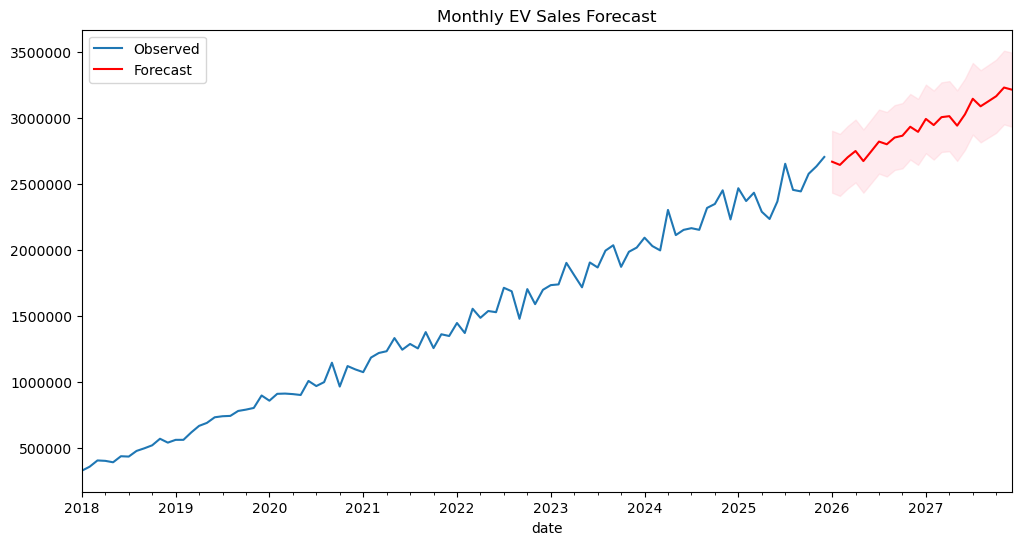

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

ax = monthly_sales.plot(label='Observed', figsize=(12,6))
forecast.predicted_mean.plot(ax=ax, label='Forecast', color='red')

ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:,0],
                forecast_ci.iloc[:,1], color='pink', alpha=0.3)

ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))

plt.title("Monthly EV Sales Forecast")
plt.legend()
plt.show()

In [45]:
import pandas as pd

df = pd.read_csv(r"C:\Users\chman\Downloads\EV_TimeSeries_50K_Extended.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Monthly aggregation
monthly_sales = df['ev_sales'].resample('M').sum()

In [46]:
train = monthly_sales.iloc[:-24]
test = monthly_sales.iloc[-24:]

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example SARIMA order (tune these!)
model = SARIMAX(train,
                order=(1,1,1),
                seasonal_order=(1,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           ev_sales   No. Observations:                   72
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -568.928
Date:                            Sat, 14 Feb 2026   AIC                           1147.855
Time:                                    12:26:21   BIC                           1156.889
Sample:                                01-31-2018   HQIC                          1151.223
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3564      0.274     -1.302      0.193      -0.893       0.180
ma.L1         -0.8500      0.203   

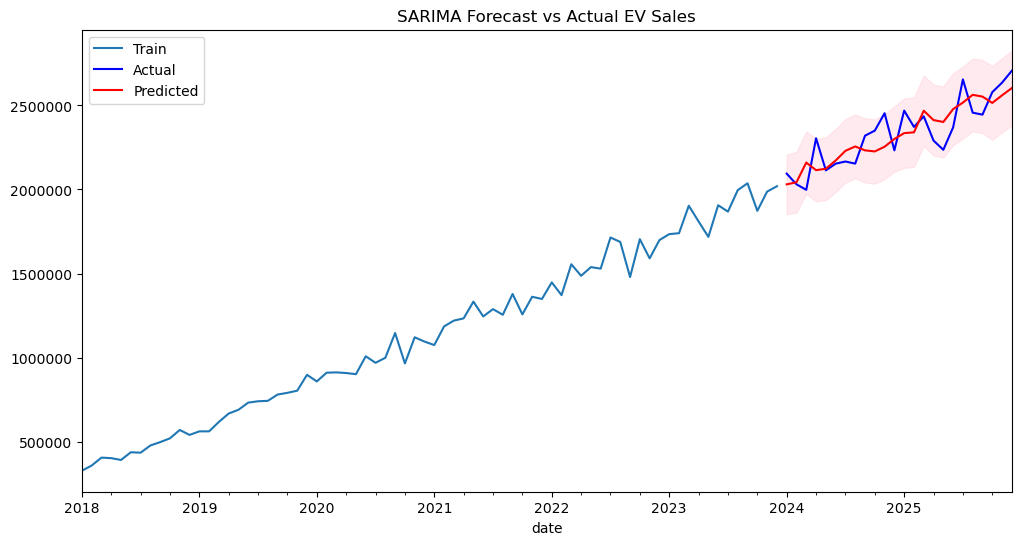

In [52]:
# Forecast same length as test set
pred = results.get_forecast(steps=len(test))
pred_ci = pred.conf_int()

# Compare actual vs predicted
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

ax = train.plot(label='Train', figsize=(12,6))
test.plot(ax=ax, label='Actual', color='blue')
pred.predicted_mean.plot(ax=ax, label='Predicted', color='red')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='pink', alpha=0.3)

# Force integer y-axis
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x)}"))

plt.title("SARIMA Forecast vs Actual EV Sales")
plt.legend()
plt.show()

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, pred.predicted_mean)
rmse = np.sqrt(mean_squared_error(test, pred.predicted_mean))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 95368.88528864505
RMSE: 108948.15222317148


In [50]:
final_model = SARIMAX(monthly_sales,
                      order=(1,1,1),
                      seasonal_order=(1,1,1,12),
                      enforce_stationarity=False,
                      enforce_invertibility=False)

final_results = final_model.fit()

future_forecast = final_results.get_forecast(steps=24)
future_values = future_forecast.predicted_mean.round().astype(int)

print(future_values)

2026-01-31    2670057
2026-02-28    2645936
2026-03-31    2704072
2026-04-30    2751165
2026-05-31    2674852
2026-06-30    2748404
2026-07-31    2822623
2026-08-31    2802305
2026-09-30    2853161
2026-10-31    2867115
2026-11-30    2934987
2026-12-31    2896467
2027-01-31    2994377
2027-02-28    2947874
2027-03-31    3007709
2027-04-30    3015257
2027-05-31    2943361
2027-06-30    3029192
2027-07-31    3147046
2027-08-31    3090080
2027-09-30    3128023
2027-10-31    3166669
2027-11-30    3232224
2027-12-31    3216293
Freq: ME, Name: predicted_mean, dtype: int64


In [56]:
import pickle

with open("sarima_model.pkl", "wb") as f:
    pickle.dump(results, f)

print("Model saved as sarima_model.pkl")


Model saved as sarima_model.pkl


In [57]:
import pickle

with open("sarima_monthly_ev_sales.pkl", "wb") as f:
    pickle.dump(results, f)

print("SARIMA model saved successfully as sarima_monthly_ev_sales.pkl")


SARIMA model saved successfully as sarima_monthly_ev_sales.pkl
